# Car data 

In [4]:
import pandas as pd

df = pd.read_excel("C:\\Users\\Admin\\OneDrive\\Documents\\Python\\Assignment\\Regression\\cars.xls")
df.head(10)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
scale = StandardScaler()

X = df[['Mileage', 'Cylinder', 'Liter','Leather']]
y = df['Price']

X[['Mileage', 'Cylinder', 'Liter','Leather']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Liter','Leather']].to_numpy())

print (X)

est = sm.OLS(y, X).fit()

est.summary()

      Mileage  Cylinder     Liter   Leather
0   -1.417485   0.52741  0.056736  0.617611
1   -1.305902   0.52741  0.056736 -1.619142
2   -0.810128   0.52741  0.056736 -1.619142
3   -0.426058   0.52741  0.056736 -1.619142
4    0.000008   0.52741  0.056736  0.617611
..        ...       ...       ...       ...
799 -0.439853   0.52741 -0.033772 -1.619142
800 -0.089966   0.52741 -0.033772 -1.619142
801  0.079605   0.52741 -0.033772 -1.619142
802  0.750446   0.52741 -0.033772 -1.619142
803  1.932565   0.52741 -0.033772 -1.619142

[804 rows x 4 columns]


C:\Users\Admin\AppData\Local\Temp\ipykernel_6316\4221894920.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Liter','Leather']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Liter','Leather']].to_numpy())


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.063
Model:                            OLS   Adj. R-squared (uncentered):              0.058
Method:                 Least Squares   F-statistic:                              13.36
Date:                Thu, 08 Jun 2023   Prob (F-statistic):                    1.52e-10
Time:                        15:44:55   Log-Likelihood:                         -9207.5
No. Observations:                 804   AIC:                                  1.842e+04
Df Residuals:                     800   BIC:                                  1.844e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mileage    -1266.6470    805.846     -1.572      0.116   -2848.470     315.176
Cylinder    4059.0669   2807.356      1.446      0.149   -1451.587    9569.721
Liter       1504.4958   2809.339      0.536      0.592   -4010.051    7019.043
Leather     1116.2450    808.463      1.381      0.168    -470.713    2703.203
==============================================================================
Omnibus:                      208.132   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              425.092
Skew:                           1.466   Prob(JB):                     4.93e-93
Kurtosis:                       5.024   Cond. No.                         6.86
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
y.groupby(df.Mileage).mean()
Z= [y.groupby(df.Mileage).mean(),y.groupby(df.Cylinder).mean(),y.groupby(df.Liter).mean()]
Z 

[Mileage
 266      10813.343521
 583      70755.466717
 636      25948.962594
 788      48310.329545
 865      16116.843916
              ...     
 41566    15792.831437
 41829    32537.186751
 42691    52001.994379
 48991    28777.959695
 50387    22244.876553
 Name: Price, Length: 791, dtype: float64,
 Cylinder
 4    17862.564874
 6    20081.395841
 8    38968.043180
 Name: Price, dtype: float64,
 Liter
 1.6    10752.833305
 1.8    15881.386094
 2.0    29968.972727
 2.2    13441.277078
 2.3    29288.283553
 2.5    24960.948265
 2.8    30455.144774
 3.0    16550.926211
 3.1    15989.528107
 3.4    16238.093335
 3.5    17788.263153
 3.6    26150.134403
 3.8    20158.316888
 4.6    39535.972594
 5.7    37076.585744
 6.0    39155.712375
 Name: Price, dtype: float64]

In [6]:
y.groupby(df.Mileage).var()
Z= [y.groupby(df.Mileage).var(),y.groupby(df.Cylinder).var(),y.groupby(df.Liter).var()]
Z 

[Mileage
 266     NaN
 583     NaN
 636     NaN
 788     NaN
 865     NaN
          ..
 41566   NaN
 41829   NaN
 42691   NaN
 48991   NaN
 50387   NaN
 Name: Price, Length: 791, dtype: float64,
 Cylinder
 4    6.132431e+07
 6    2.144823e+07
 8    1.151830e+08
 Name: Price, dtype: float64,
 Liter
 1.6    8.999244e+05
 1.8    8.310764e+05
 2.0    1.787979e+07
 2.2    1.665095e+06
 2.3    5.188250e+06
 2.5    3.961885e+06
 2.8    2.239019e+06
 3.0    2.300490e+06
 3.1    8.617428e+05
 3.4    1.213758e+06
 3.5    3.116518e+06
 3.6    6.966683e+07
 3.8    7.918118e+06
 4.6    1.626981e+08
 5.7    7.361836e+07
 6.0    1.650359e+07
 Name: Price, dtype: float64]

In [7]:
y.groupby(df.Mileage).std()
Z= [y.groupby(df.Mileage).std(),y.groupby(df.Cylinder).std(),y.groupby(df.Liter).std()]
Z 

[Mileage
 266     NaN
 583     NaN
 636     NaN
 788     NaN
 865     NaN
          ..
 41566   NaN
 41829   NaN
 42691   NaN
 48991   NaN
 50387   NaN
 Name: Price, Length: 791, dtype: float64,
 Cylinder
 4     7830.983772
 6     4631.223041
 8    10732.332262
 Name: Price, dtype: float64,
 Liter
 1.6      948.643470
 1.8      911.633916
 2.0     4228.449702
 2.2     1290.385546
 2.3     2277.772998
 2.5     1990.448521
 2.8     1496.335152
 3.0     1516.736674
 3.1      928.301041
 3.4     1101.706688
 3.5     1765.366246
 3.6     8346.665593
 3.8     2813.915118
 4.6    12755.315565
 5.7     8580.114141
 6.0     4062.460526
 Name: Price, dtype: float64]

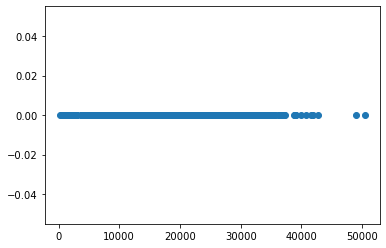

In [8]:
from scipy.stats import norm
import matplotlib.pyplot as plt
axes = plt.axes()
plt.scatter(df['Mileage'], norm.pdf(df['Price']))
                                                   
plt.show()

In [9]:
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
print(skew(df['Mileage'], axis=0, bias=True))
print(kurtosis(df['Mileage'], axis=0, bias=True))


-0.13100160619425358
0.17531415764534142


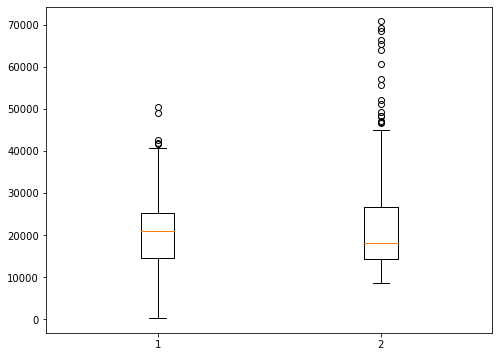

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(8, 6))

data = df[['Mileage','Price']]
plt.boxplot(data)
# show plot
plt.savefig('C:\\Users\\syed mubarak pasha\\Downloads\\boxplot 1.jpg', format='jpg')